# EDA (Exploratory Data Analysis)

In [1]:
#import libraries
import numpy as np
import pandas as pd
import gc
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size
sns.set_style('darkgrid')
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download datasets 
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')

### Data Exploration

There are 5 datasets, lets look at each one of them.

In [3]:
# Total aisles
len(aisles.aisle.unique())

134

In [4]:
# Departments
len(departments.department.unique())

21

In [5]:
# Orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [6]:
#Total orders made
len(orders.order_id.unique())

3421083

In [7]:
# Total users making these orders
len(orders.user_id.unique())

206209

In [8]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [9]:
orders.order_number.describe()

count    3.421083e+06
mean     1.715486e+01
std      1.773316e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.300000e+01
max      1.000000e+02
Name: order_number, dtype: float64

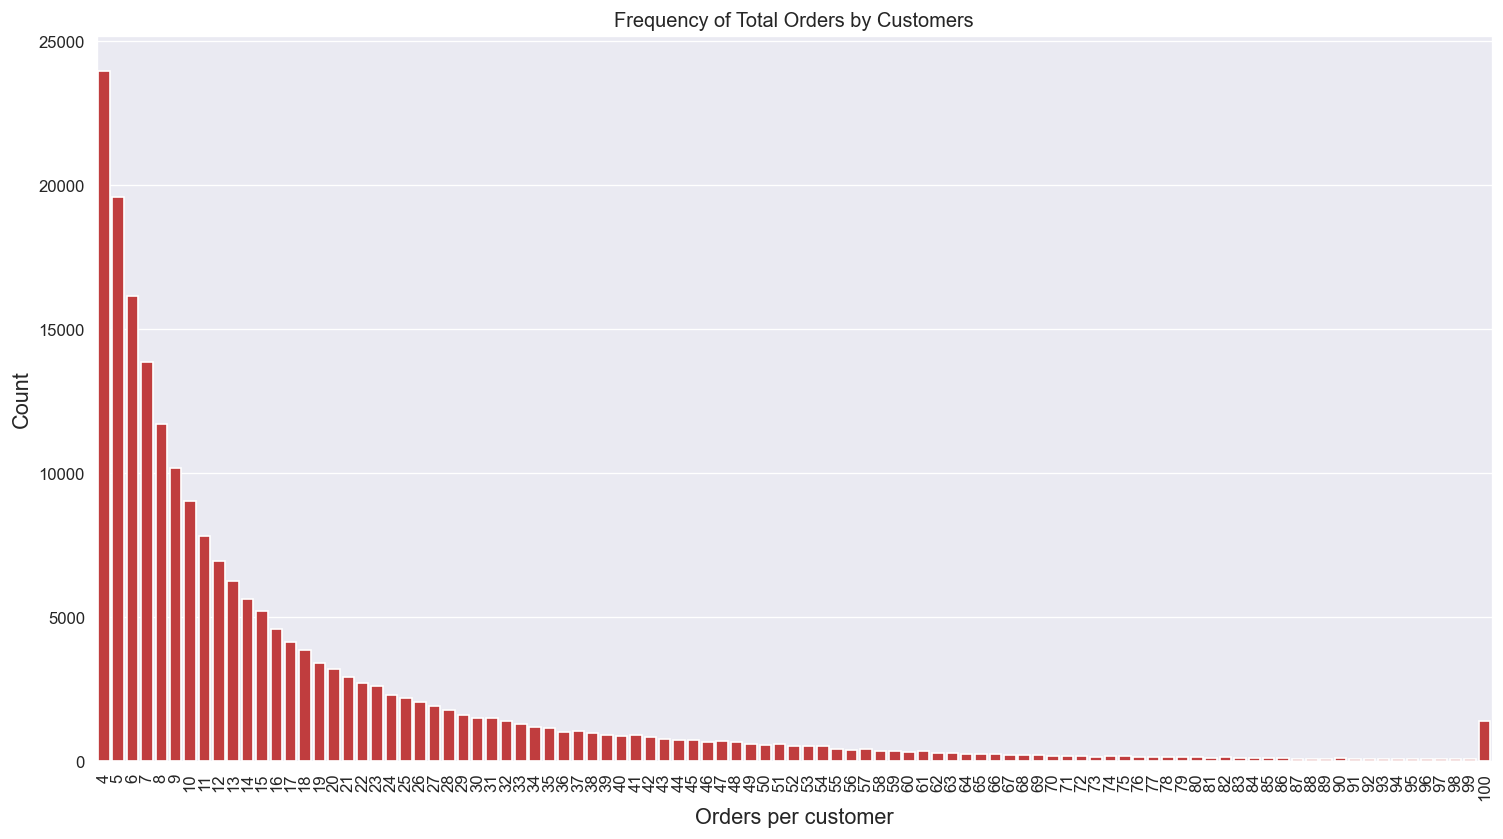

In [10]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x = order_number.index, y = order_number.values, color = color[3])
ax.set_xlabel('Orders per customer', fontsize = 13)
ax.set_ylabel('Count', fontsize = 13)
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.set_title('Frequency of Total Orders by Customers')
plt.show()
fig.savefig('Frequency of Total Orders by Customers.png')

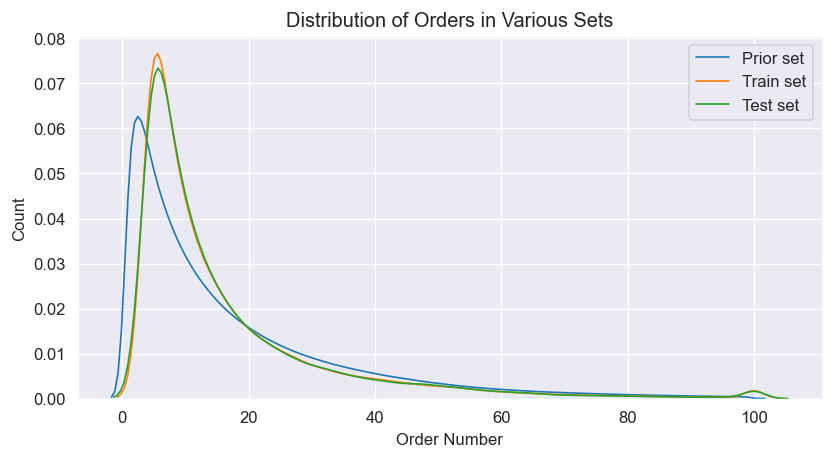

In [11]:
fig, ax = plt.subplots(figsize = (8,4))
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'prior'], label = "Prior set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'train'], label = "Train set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'test'], label = "Test set", lw = 1)
ax.legend()
ax.set_xlabel('Order Number')
ax.set_ylabel('Count')
ax.tick_params(axis = 'both', labelsize = 10)
ax.set_title('Distribution of Orders in Various Sets')
fig.savefig('Distribution of Orders in Various Sets.png')
plt.show()

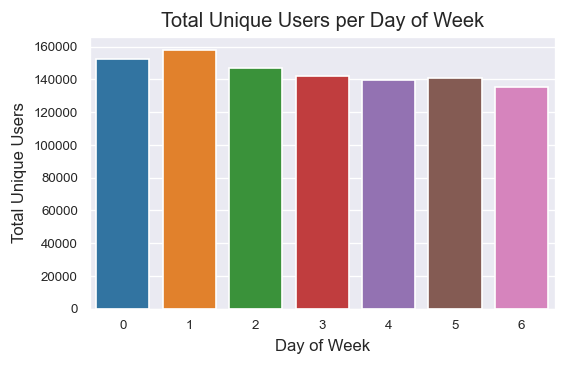

In [12]:
temp_df = orders.groupby('order_dow')['user_id'].nunique()

fig, ax = plt.subplots(figsize = (5,3))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Day of Week', size = 10)
ax.set_ylabel('Total Unique Users', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Unique Users per Day of Week')
fig.savefig('Total Unique Users per Day of Week.png')
plt.show()

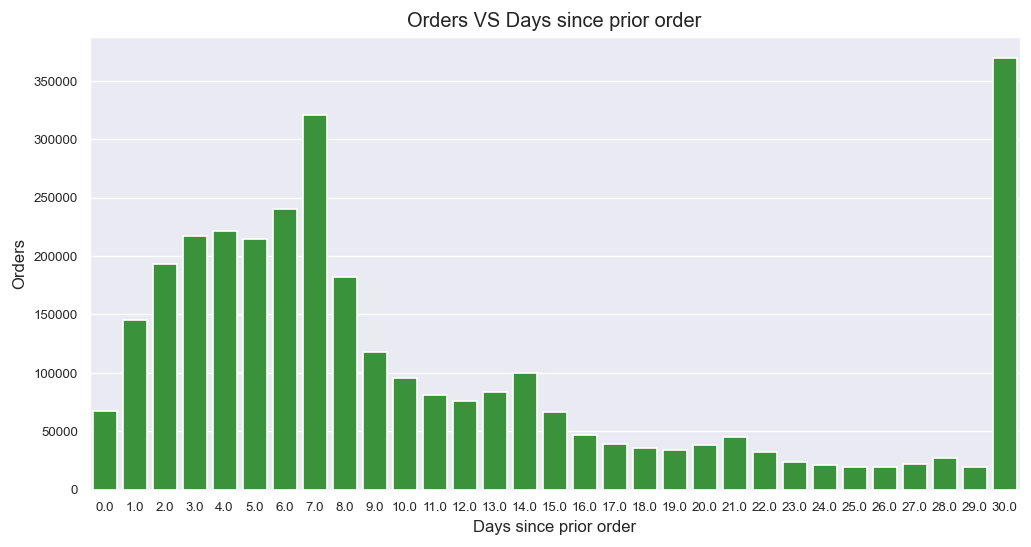

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(orders.days_since_prior_order, color = color[2])
ax.set_xlabel('Days since prior order', size = 10)
ax.set_ylabel('Orders', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Orders VS Days since prior order')
#fig.savefig('Orders VS Days since prior order.png')
plt.show()

In [14]:
temp_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
temp_df = temp_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
temp_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


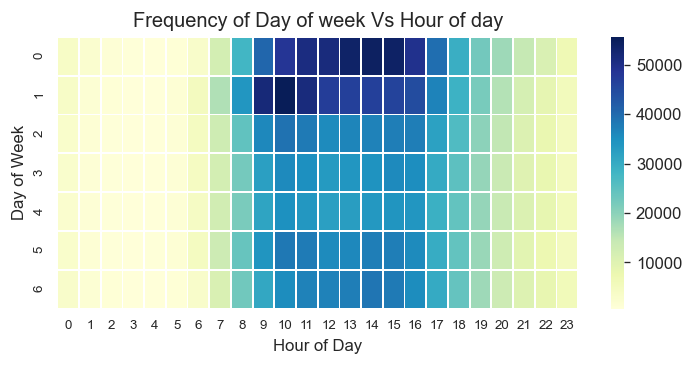

In [15]:
ax = plt.subplots(figsize=(7,3))
ax = sns.heatmap(temp_df, cmap="YlGnBu", linewidths=.5)
ax.set_title("Frequency of Day of week Vs Hour of day", size = 12)
ax.set_xlabel("Hour of Day", size = 10)
ax.set_ylabel("Day of Week", size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()
fig.savefig("Frequency of Day of week Vs Hour of day.png")
plt.show()

In [16]:
len(order_products_prior.order_id.unique())

3214874

In [17]:
len(order_products_prior.product_id.unique())

49677

In [18]:
add_to_cart_order_prior = order_products_prior.groupby('order_id')['add_to_cart_order'].count()
add_to_cart_order_prior = add_to_cart_order_prior.value_counts()
add_to_cart_order_prior.index.max()

145

Text(0.5, 1.0, 'Frequency of Items in Cart in Prior set')

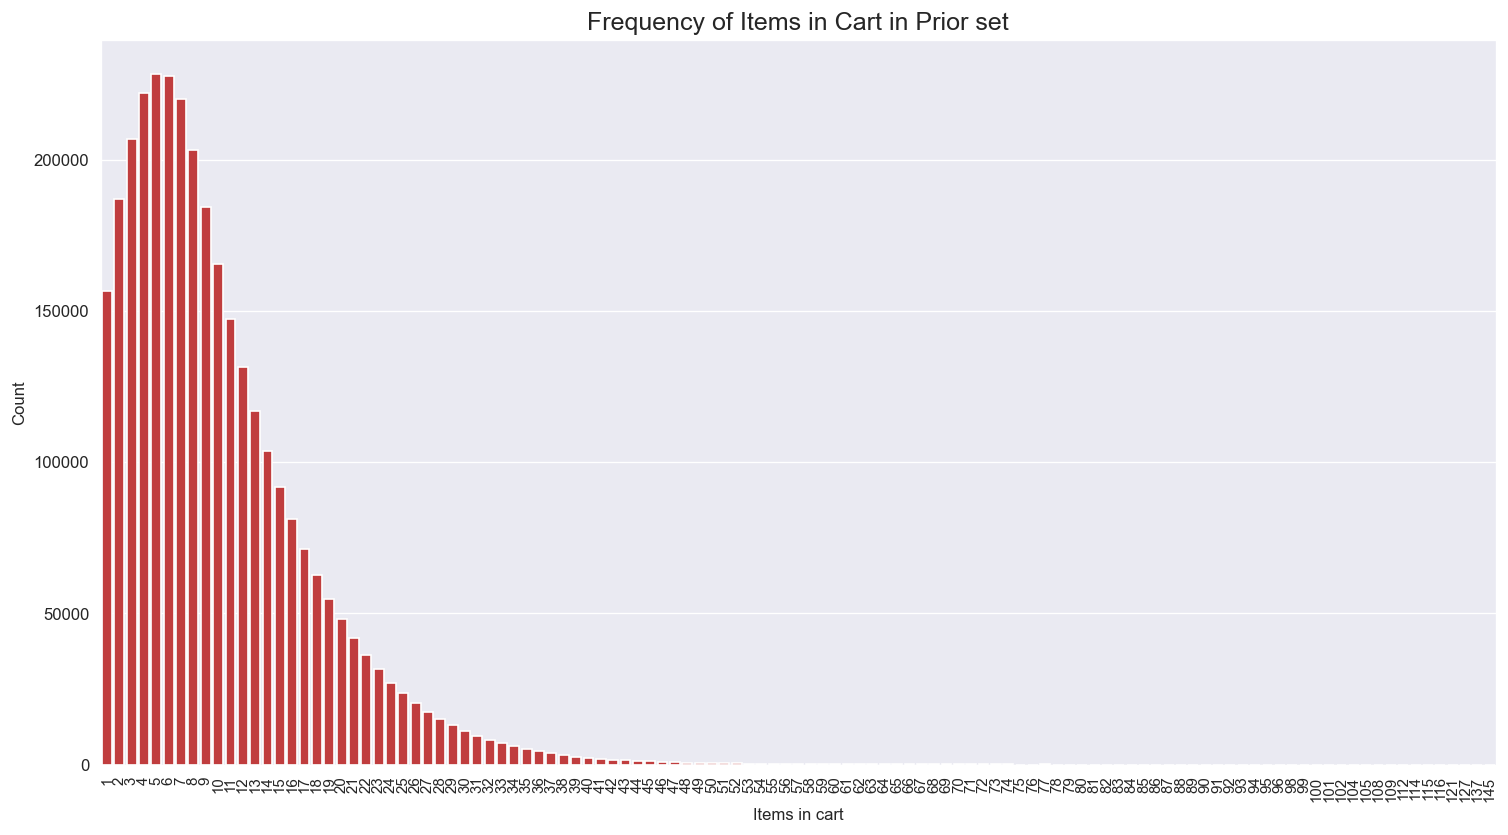

In [19]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = add_to_cart_order_prior.index, y = add_to_cart_order_prior.values, color = color[3])
ax.set_xlabel('Items in cart')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize = 9)
ax.set_title('Frequency of Items in Cart in Prior set', size = 15)
#fig.savefig('Frequency of Items in Cart in Prior set.png')

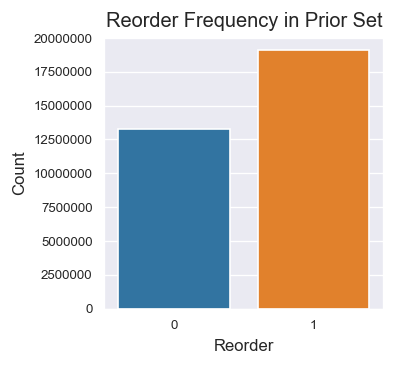

In [20]:
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.barplot(x = order_products_prior.reordered.value_counts().index, 
                y = order_products_prior.reordered.value_counts().values)
ax.set_xlabel('Reorder', size = 10)
ax.set_ylabel('Count', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Reorder Frequency in Prior Set')
#fig.savefig('Reorder Frequency in Prior Set')
plt.show()

In [21]:
print('Percentage of reorder in prior set:',
      format(order_products_prior[order_products_prior.reordered == 1].shape[0]*100/order_products_prior.shape[0], '.2f'))


Percentage of reorder in prior set: 58.97


In [22]:
len(order_products_train.order_id.unique())

131209

In [23]:
len(order_products_train.product_id.unique())

39123

In [24]:
add_to_cart_order_train = order_products_prior.groupby('order_id')['add_to_cart_order'].count()
add_to_cart_order_train = add_to_cart_order_train.value_counts()
add_to_cart_order_train.index.max()

145

Text(0.5, 1.0, 'Frequency of Items in Cart in Train set')

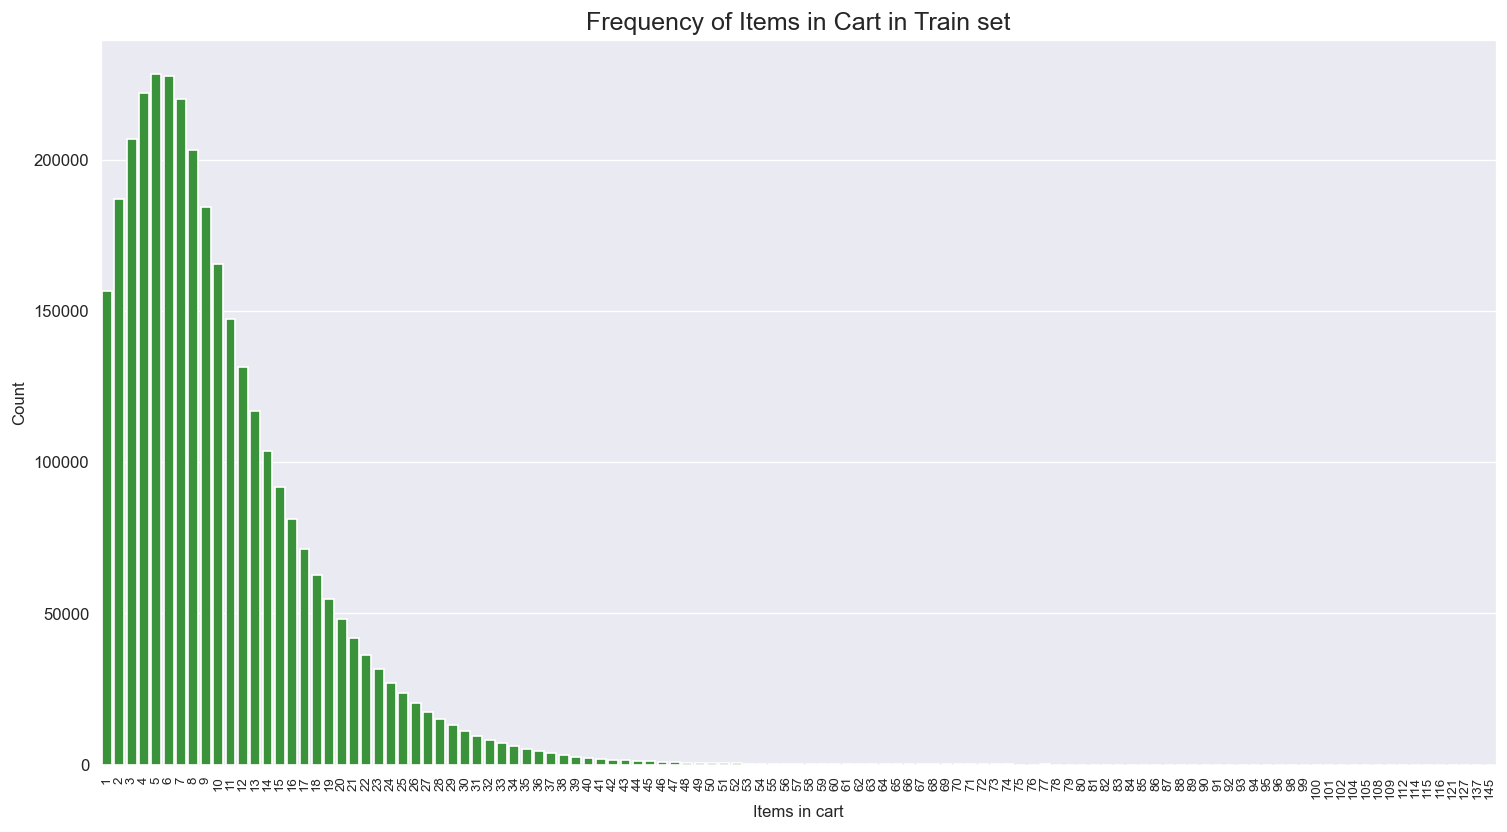

In [25]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = add_to_cart_order_train.index, y = add_to_cart_order_train.values, color = color[2])
ax.set_xlabel('Items in cart')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize = 8)
ax.set_title('Frequency of Items in Cart in Train set', size = 15)

In [26]:
print('Percentage of reorder in train set:',
      format(order_products_train[order_products_train.reordered == 1].shape[0]*100/order_products_train.shape[0], '.2f'))

Percentage of reorder in train set: 59.86


In [27]:
len(products.product_name.unique())

49688

In [28]:
len(products.aisle_id.unique())

134

In [29]:
len(products.department_id.unique())

21

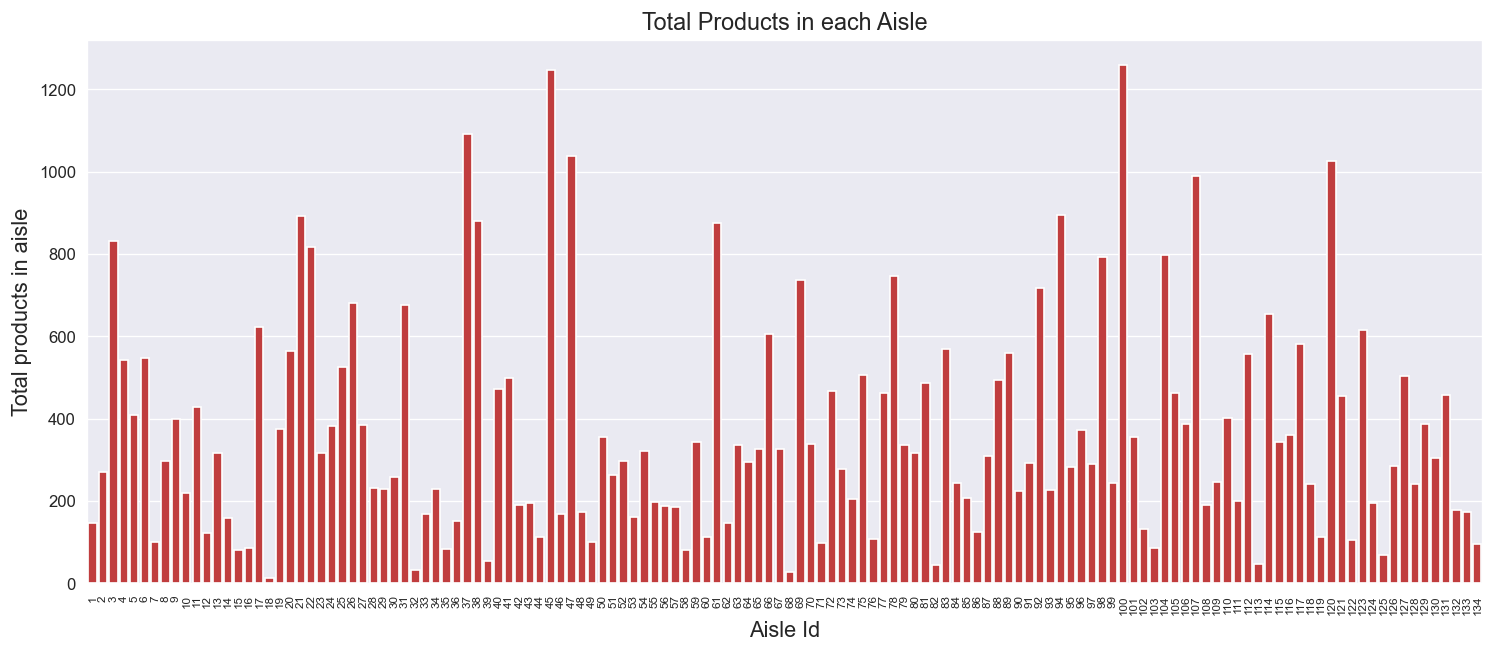

In [32]:
temp_df = products.groupby('aisle_id')['product_id'].count()

fig, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(x = temp_df.index, y = temp_df.values, color = color[3])
ax.set_xlabel('Aisle Id', size = 13)
ax.set_ylabel('Total products in aisle', size = 13)
ax.xaxis.set_tick_params(rotation=90, labelsize = 7)
ax.set_title('Total Products in each Aisle', size = 14)
fig.savefig('Total Products in each Aisle')

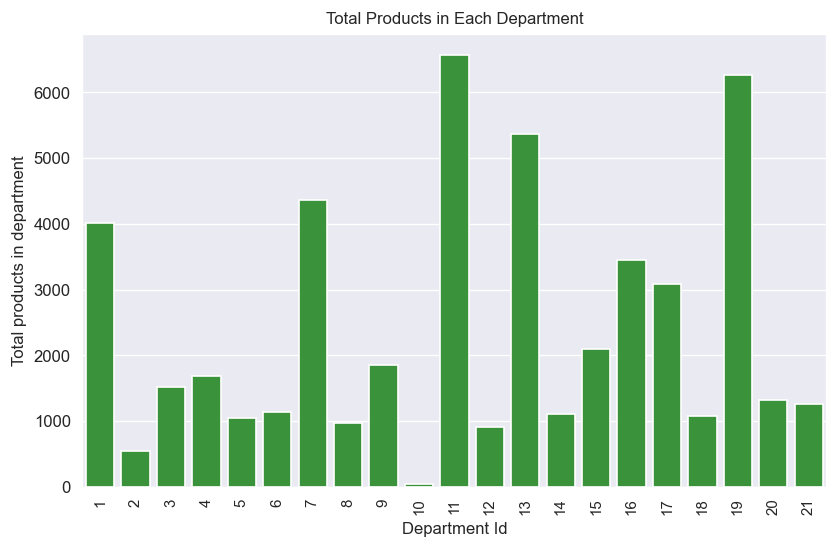

In [35]:
temp_df = products.groupby('department_id')['product_id'].count()

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = temp_df.index, y = temp_df.values, color = color[2])
ax.set_xlabel('Department Id')
ax.set_ylabel('Total products in department')
ax.xaxis.set_tick_params(rotation=90, labelsize = 9)
ax.set_title('Total Products in Each Department', size = 10)
fig.savefig('Total Products in Each Department')

Text(0.5, 1.0, 'Total Aisles in Each Department')

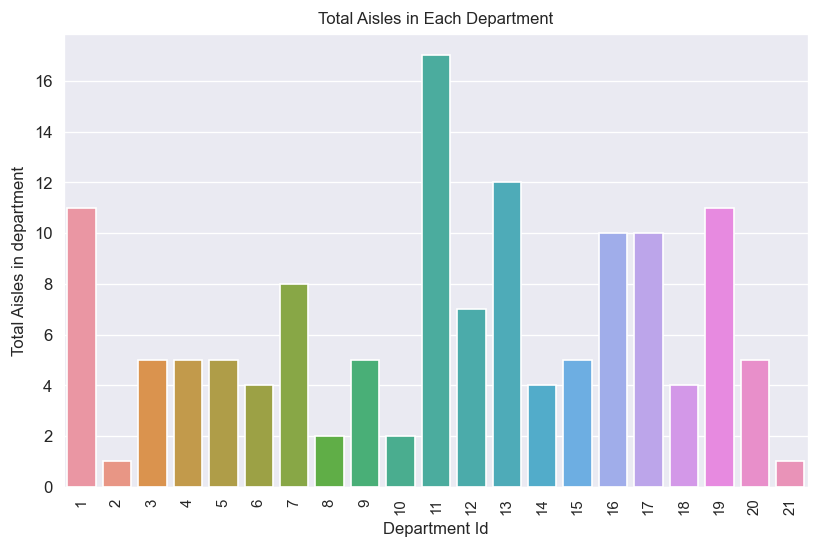

In [36]:
temp_df = products.groupby('department_id')['aisle_id'].nunique()

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Department Id')
ax.set_ylabel('Total Aisles in department')
ax.xaxis.set_tick_params(rotation=90, labelsize = 9)
ax.set_title('Total Aisles in Each Department', size = 10)


## Data Analysis
For Analysis, I am combining order_products_train and order_products_prior as order_products. Based on order_id, product_id, aisle_id and department_id I will merge those data with order_products and will create one single dataframe.

In [37]:
order_products = order_products_prior.append(order_products_train)
order_products.shape

(33819106, 4)

In [38]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(33819106, 15)

In [39]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [40]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
product_name              object
aisle_id                  int64
department_id             int64
aisle                     object
department                object
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


### Reduce memory for faster analysis

In [41]:
def reduce_memory(df):
    
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

In [ ]:
order_products = reduce_memory(order_products)

## Analysis

In [ ]:
order_products.head()

### Aisles
**Total Orders and Reorders From Most Popular Aisles**

In [ ]:
temp_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.aisle[0:10], x = temp_df.total[0:10], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.aisle[0:10], x = temp_df.reorders[0:10], color=color[3], label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
fig.savefig('Total Orders and Reorders From Most Popular Aisles'.png')
plt.show()

**20 Aisles with Highest Reorder Ratio**

In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorder_ratio[0:20], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

**20 Aisles with Lowest Reorder Ratio**

In [ ]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[-21:], x = temp_df.reorder_ratio[-21:], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Lowest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

### Departments

In [ ]:
#Departments
temp_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

**Total Orders and Reorders From Departments**

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department, x = temp_df["total"], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.department, x = temp_df["reorders"], color=color[3], label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()

**Departments with highest reorder**

In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.department, x = temp_df.reorder_ratio, color=color[0])
ax.set_ylabel("Departments")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Departments with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
fig.savefig('Departments with Highest Reorder Ratio'.png')
plt.show()


### Products

In [ ]:
#Products
temp_df = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
fig.savefig('Most Popular Products'.png')
plt.show()

In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df.sort_values("reorder_ratio", ascending=False).head(10)

In [ ]:
product_unique_users = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

In [ ]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)

**Organic vs Inorganic**

In [ ]:

product_unique_users['Organic'] = product_unique_users.product_name.str.contains("Organic")
product_unique_users.head()

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Total Products", size = 9)
ax.set_title("Total Organic and Inorganic products", size = 10)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Mean reorder ratio", size = 9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
fig.savefig('Mean Reorder Ratio of Organic/Inorganic Products'.png')
plt.show()

**Add to Cart Order VS Reorder**

In [ ]:
temp_df = order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='o')
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
fig.savefig('Add to Cart Order VS Reorder Ratio'.png')
plt.show()

In [ ]:
temp_df = order_products.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

**Most Popular Products on different days**

In [ ]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")